# 1. Importing the libraries and MNIST Dataset

In [52]:
import numpy as np
from keras.datasets import mnist
from keras.callbacks import EarlyStopping

data = mnist.load_data()
data

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [53]:
type(data[0])

tuple

# 2. Data Preprocessing

In [54]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
(X_train, y_train), (X_test, y_test) = data
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


# print the shape of all the data sets with description
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_val shape: ", X_val.shape)
print("y_val shape: ", y_val.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (48000, 28, 28)
y_train shape:  (48000,)
X_val shape:  (12000, 28, 28)
y_val shape:  (12000,)
X_test shape:  (10000, 28, 28)
y_test shape:  (10000,)


In [55]:
# Reshape the data
X_train = X_train.reshape((X_train.shape[0], 28*28)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28*28)).astype('float32')
X_val = X_val.reshape((X_val.shape[0], 28*28)).astype('float32')

In [56]:
# Normalize the pixel values from a scale of 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# 3. Building the Model with Keras

In [57]:
from keras.models import Sequential
from keras.layers import Dense

# Topology of the model
# 784 -> 256 -> 10
model = Sequential()
model.add(Dense(256, input_dim = 28 * 28, activation= 'relu'))
# model.add(Dense(64, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [58]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 256)               200960    
                                                                 
 dense_11 (Dense)            (None, 10)                2570      
                                                                 
Total params: 203530 (795.04 KB)
Trainable params: 203530 (795.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# 4. Training the Model

In [59]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

history = model.fit(X_train, y_train, 
                    epochs=10, 
                    batch_size=100, 
                    validation_data=(X_val, y_val), 
                    callbacks=[early_stopping])

Epoch 1/10
480/480 [==============================] - 3s 4ms/step - loss: 0.3156 - accuracy: 0.9118 - val_loss: 21.3761 - val_accuracy: 0.9497
Epoch 2/10
480/480 [==============================] - 2s 4ms/step - loss: 0.1412 - accuracy: 0.9590 - val_loss: 16.9034 - val_accuracy: 0.9592
Epoch 3/10
480/480 [==============================] - 2s 4ms/step - loss: 0.0970 - accuracy: 0.9720 - val_loss: 13.6944 - val_accuracy: 0.9707
Epoch 4/10
480/480 [==============================] - 2s 4ms/step - loss: 0.0718 - accuracy: 0.9799 - val_loss: 12.5163 - val_accuracy: 0.9739
Epoch 5/10
480/480 [==============================] - 2s 4ms/step - loss: 0.0546 - accuracy: 0.9838 - val_loss: 13.7531 - val_accuracy: 0.9734
Epoch 6/10
480/480 [==============================] - 2s 4ms/step - loss: 0.0416 - accuracy: 0.9884 - val_loss: 13.4495 - val_accuracy: 0.9757


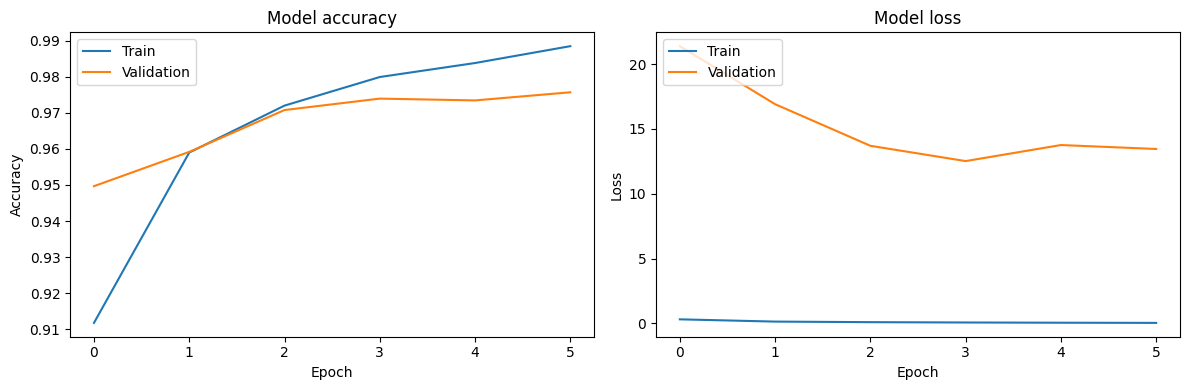

In [60]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


# 5. Evaluating the Model

In [61]:
scores = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0873 - accuracy: 0.9735


In [62]:
from sklearn.metrics import classification_report
import numpy as np

predictions = model.predict(X_test)
y_pred = np.argmax(predictions, axis=1)
print(classification_report(y_test, y_pred, digits=4))


313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0     0.9720    0.9908    0.9813       980
           1     0.9783    0.9921    0.9851      1135
           2     0.9682    0.9738    0.9710      1032
           3     0.9760    0.9644    0.9701      1010
           4     0.9640    0.9817    0.9728       982
           5     0.9711    0.9787    0.9749       892
           6     0.9811    0.9760    0.9785       958
           7     0.9646    0.9796    0.9720      1028
           8     0.9807    0.9405    0.9602       974
           9     0.9797    0.9554    0.9674      1009

    accuracy                         0.9735     10000
   macro avg     0.9736    0.9733    0.9733     10000
weighted avg     0.9736    0.9735    0.9735     10000
